In [1]:
import os , glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline

In [3]:
# Import Dataset for Analysis
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
df = pd.read_csv('/content/drive/My Drive/online_shoppers_intention.csv')

In [5]:
print(df.head(10))


   Administrative  Administrative_Duration  Informational  \
0               0                      0.0              0   
1               0                      0.0              0   
2               0                      0.0              0   
3               0                      0.0              0   
4               0                      0.0              0   
5               0                      0.0              0   
6               0                      0.0              0   
7               1                      0.0              0   
8               0                      0.0              0   
9               0                      0.0              0   

   Informational_Duration  ProductRelated  ProductRelated_Duration  \
0                     0.0               1                 0.000000   
1                     0.0               2                64.000000   
2                     0.0               1                 0.000000   
3                     0.0               2       

In [6]:
print(df.columns)

Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Month',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType',
       'Weekend', 'Revenue'],
      dtype='object')


In [7]:
df.shape

(12330, 18)

In [8]:
df.describe

<bound method NDFrame.describe of        Administrative  Administrative_Duration  Informational  \
0                   0                      0.0              0   
1                   0                      0.0              0   
2                   0                      0.0              0   
3                   0                      0.0              0   
4                   0                      0.0              0   
...               ...                      ...            ...   
12325               3                    145.0              0   
12326               0                      0.0              0   
12327               0                      0.0              0   
12328               4                     75.0              0   
12329               0                      0.0              0   

       Informational_Duration  ProductRelated  ProductRelated_Duration  \
0                         0.0               1                 0.000000   
1                         0.0               2                64.000000   
2                         0.0               1                 0.000000   
3                         0.0               2                 2.666667   
4                         0.0              10               627.500000   
...                       ...             ...                      ...   
12325                     0.0              53              1783.791667   
12326                     0.0               5               465.750000   
12327                     0.0               6               184.250000   
12328                     0.0              15               346.000000   
12329                     0.0               3                21.250000   

       BounceRates  ExitRates  PageValues  SpecialDay Month  OperatingSystems  \
0         0.200000   0.200000    0.000000         0.0   Feb                 1   
1         0.000000   0.100000    0.000000         0.0   Feb                 2   
2         0.200000   0.200000    0.000000         0.0   Feb                 4   
3         0.050000   0.140000    0.000000         0.0   Feb                 3   
4         0.020000   0.050000    0.000000         0.0   Feb                 3   
...            ...        ...         ...         ...   ...               ...   
12325     0.007143   0.029031   12.241717         0.0   Dec                 4   
12326     0.000000   0.021333    0.000000         0.0   Nov                 3   
12327     0.083333   0.086667    0.000000         0.0   Nov                 3   
12328     0.000000   0.021053    0.000000         0.0   Nov                 2   
12329     0.000000   0.066667    0.000000         0.0   Nov                 3   

       Browser  Region  TrafficType        VisitorType  Weekend  Revenue  
0            1       1            1  Returning_Visitor    False    False  
1            2       1            2  Returning_Visitor    False    False  
2            1       9            3  Returning_Visitor    False    False  
3            2       2            4  Returning_Visitor    False    False  
4            3       1            4  Returning_Visitor     True    False  
...        ...     ...          ...                ...      ...      ...  
12325        6       1            1  Returning_Visitor     True    False  
12326        2       1            8  Returning_Visitor     True    False  
12327        2       1           13  Returning_Visitor     True    False  
12328        2       3           11  Returning_Visitor    False    False  
12329        2       1            2        New_Visitor     True    False  

[12330 rows x 18 columns]>

In [9]:
# Count Missing Value
mv=df.isnull().sum()
mv

,0
Administrative,0
Administrative_Duration,0
Informational,0
Informational_Duration,0
ProductRelated,0
ProductRelated_Duration,0
BounceRates,0
ExitRates,0
PageValues,0
SpecialDay,0


/tmp/ipython-input-1573909512.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x="Revenue", data=df, palette={"True":"green", "False":"red"})


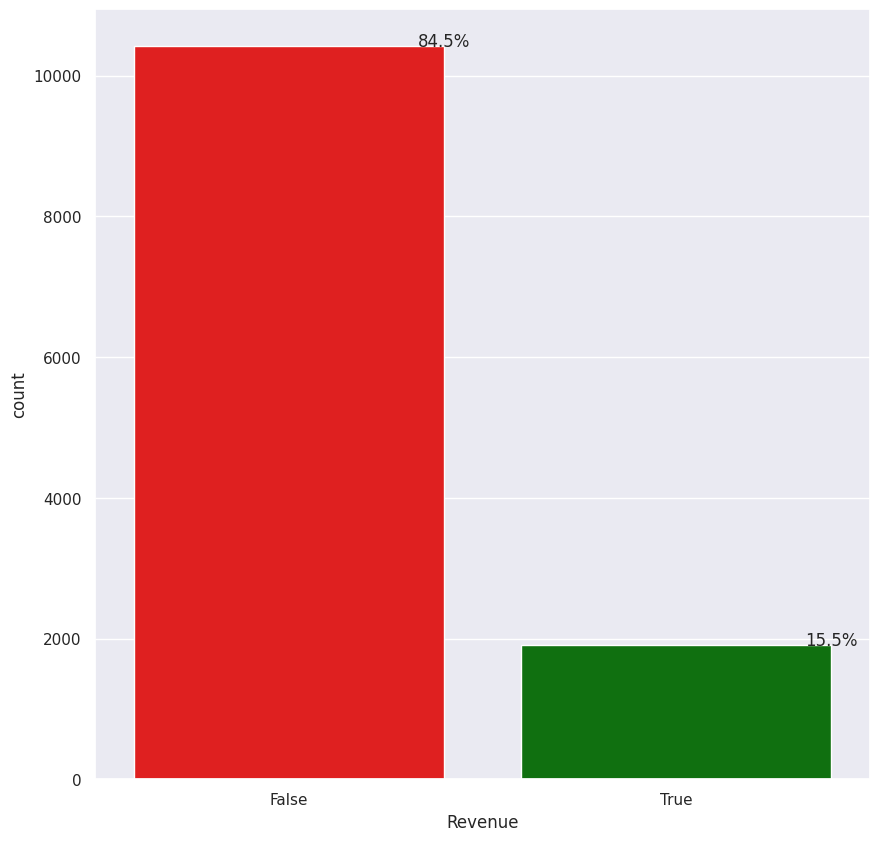

In [10]:
import seaborn as sns
sns.set(style="darkgrid")
plt.figure(figsize=(10,10))
total = float(len(df))
ax = sns.countplot(x="Revenue", data=df, palette={"True":"green", "False":"red"})
for p in ax.patches:
  percentage = '{:.1f}%'.format(100 * p.get_height()/total)
  x = p.get_x() + p.get_width()
  y = p.get_height()
  ax.annotate(percentage, (x, y),ha='center')
plt.show()

/tmp/ipython-input-79739226.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x="VisitorType", data=df , palette = {"Returning_Visitor":"Blue" , "New_Visitor":"Green" , "Other":"Red"})


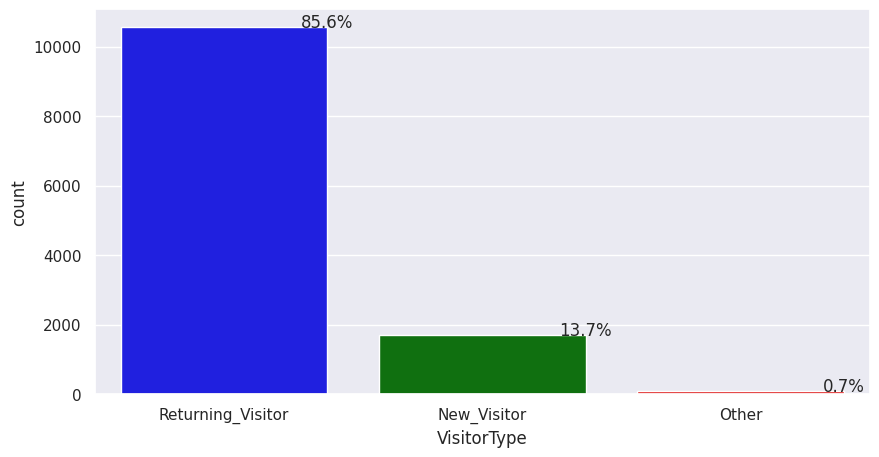

In [11]:
df['VisitorType'].value_counts()
sns.set(style="darkgrid")
plt.figure(figsize=(10,5))
total = float(len(df))
ax = sns.countplot(x="VisitorType", data=df , palette = {"Returning_Visitor":"Blue" , "New_Visitor":"Green" , "Other":"Red"})
for p in ax.patches:
  percentage = '{:.1f}%'.format(100* p.get_height()/total)
  x=p.get_x() + p.get_width()
  y=p.get_height()
  ax.annotate(percentage, (x,y),ha='center')
plt.show()

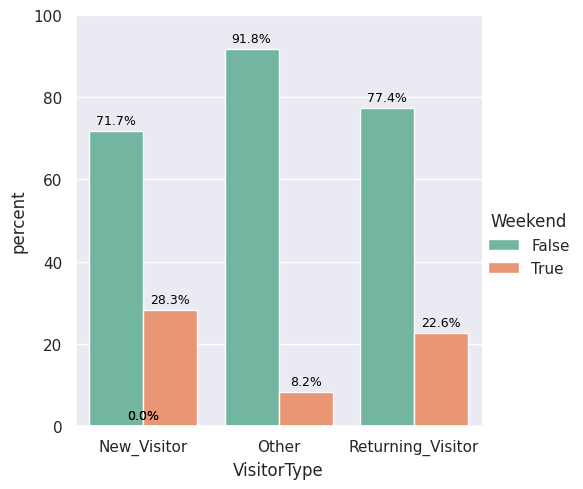

In [12]:
x, y = 'VisitorType', 'Weekend'
df1 = df.groupby(x)[y].value_counts(normalize=True)
df1 = df1.mul(100).rename('percent').reset_index()

g = sns.catplot(x=x, y='percent', hue=y, kind='bar', data=df1, palette="Set2")
g.ax.set_ylim(0,100)

# Annotate each bar
for p in g.ax.patches:
    height = p.get_height()
    txt = f"{height:.1f}%"
    g.ax.text(p.get_x() + p.get_width()/2., height + 1, txt,
              ha='center', va='bottom', fontsize=9, color='black')


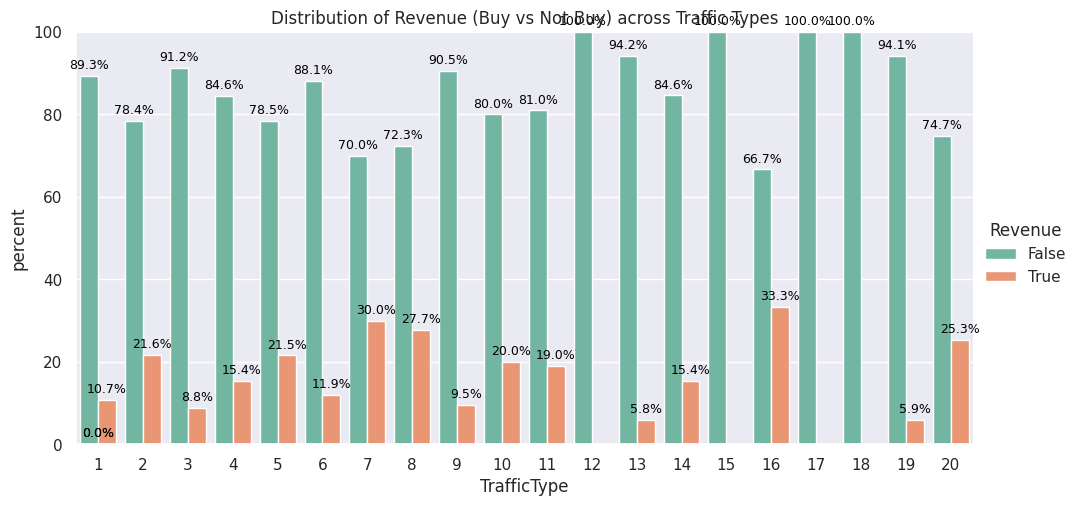

In [13]:
x, y = 'TrafficType', 'Revenue'
df1 = df.groupby(x)[y].value_counts(normalize=True)
df1 = df1.mul(100).rename('percent').reset_index()

# Plot with palette for better contrast
g = sns.catplot(x=x, y='percent', hue=y, kind='bar', data=df1,
                palette="Set2", height=5, aspect=2)

g.ax.set_ylim(0, 100)
g.ax.set_title("Distribution of Revenue (Buy vs Not Buy) across Traffic Types")

# Annotate bars with centered percentages
for p in g.ax.patches:
    height = p.get_height()
    g.ax.text(p.get_x() + p.get_width()/2.,   # center horizontally
              height + 1,                     # slightly above bar
              f"{height:.1f}%",               # formatted percentage
              ha='center', va='bottom', fontsize=9, color='black')

plt.show()

Text(0, 0.5, 'Count')

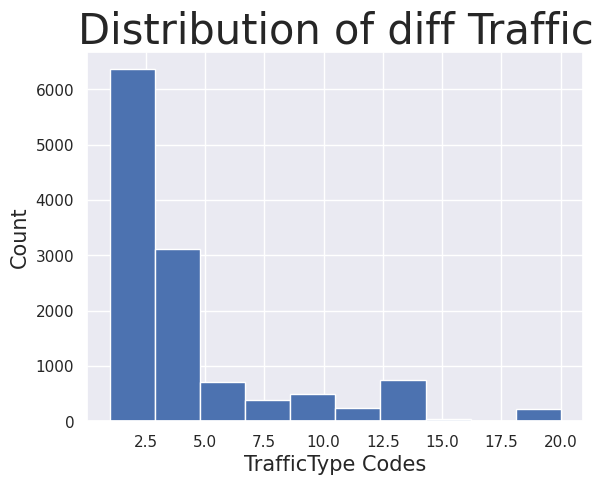

In [14]:
# 11. Distribution of Customers Based on Different Traffic Type Codes

plt.hist(df['TrafficType'])
plt.title('Distribution of diff Traffic',fontsize = 30)
plt.xlabel('TrafficType Codes', fontsize = 15)
plt.ylabel('Count', fontsize = 15)

Text(0, 0.5, 'Count')

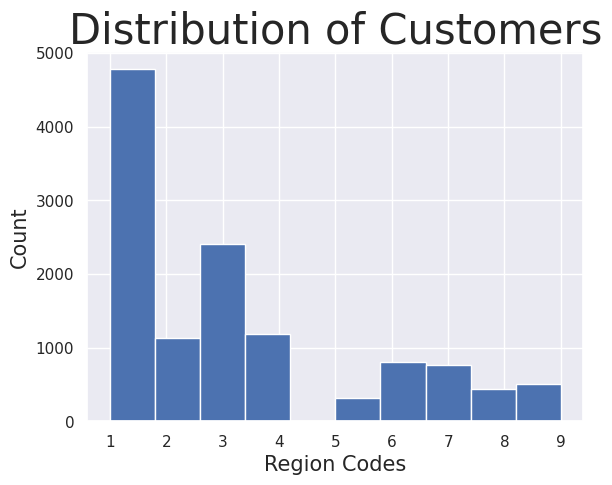

In [15]:
# Step 12: Distribution of Customers based on Region Codes

plt.hist(df['Region'])
plt.title('Distribution of Customers',fontsize = 30)
plt.xlabel('Region Codes', fontsize = 15)
plt.ylabel('Count', fontsize = 15)

Text(0, 0.5, 'Count')

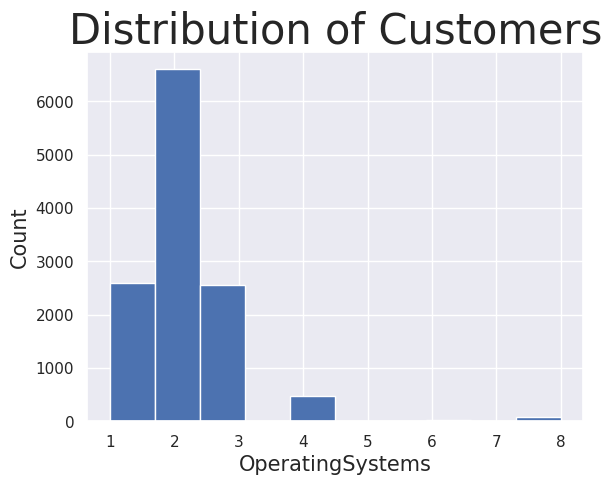

In [16]:
# Step 13 : Distribution of Customers based on OS
plt.hist(df['OperatingSystems'])
plt.title('Distribution of Customers',fontsize = 30)
plt.xlabel('OperatingSystems', fontsize = 15)
plt.ylabel('Count', fontsize = 15)

Text(0, 0.5, 'Count')

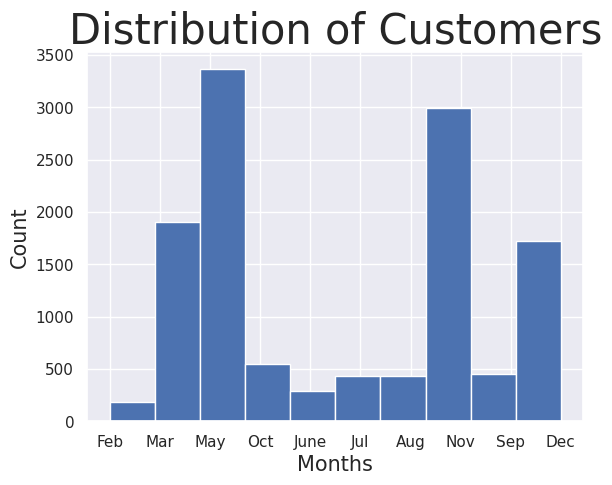

In [17]:
# Distribution of Customers Over Months

plt.hist(df['Month'])
plt.title('Distribution of Customers',fontsize = 30)
plt.xlabel('Months', fontsize = 15)
plt.ylabel('Count', fontsize = 15)

/tmp/ipython-input-1419357181.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(x="Revenue", y="PageValues", data=df , palette={"True": "darkgreen", "False": "red"})


<Axes: xlabel='Revenue', ylabel='PageValues'>

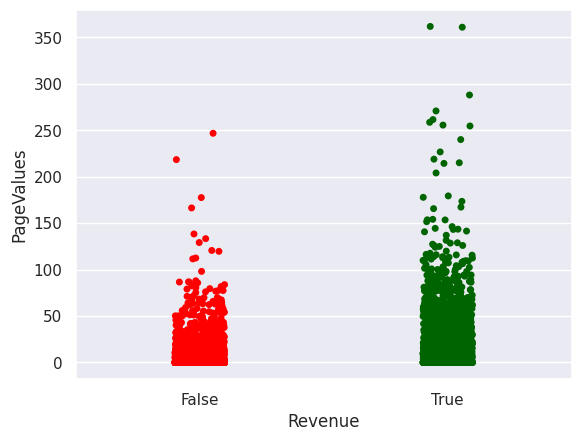

In [18]:
# Step 15: Distribution of Pagevalues over Revenue. seaborn.stripplot draws a scatterplot where one variable is categorical.

sns.stripplot(x="Revenue", y="PageValues", data=df , palette={"True": "darkgreen", "False": "red"})

/tmp/ipython-input-1299592785.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(x="Revenue", y="BounceRates", data=df , palette={"True": "darkgreen", "False": "red"})


<Axes: xlabel='Revenue', ylabel='BounceRates'>

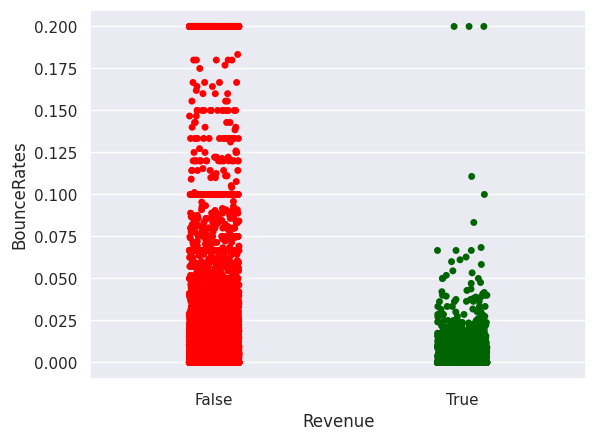

In [19]:
# Step 16: Distribution of Revenue Over BounceRates
sns.stripplot(x="Revenue", y="BounceRates", data=df , palette={"True": "darkgreen", "False": "red"})

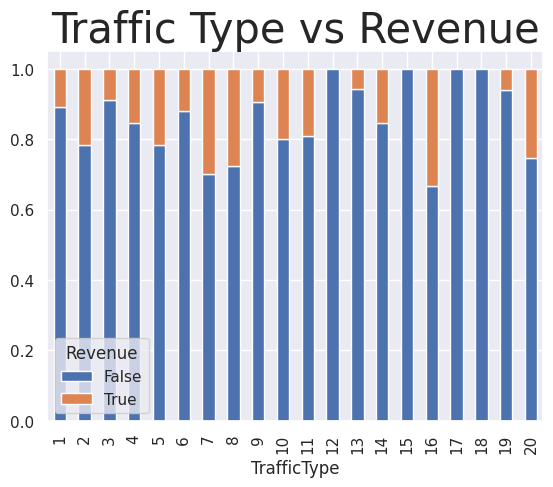

In [20]:
# Step 17: Distribution of Traffice Type Over Revenue

df2 = pd.crosstab(df['TrafficType'], df['Revenue'])
df2.div(df2.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked = True)
plt.title('Traffic Type vs Revenue', fontsize = 30)
plt.show()

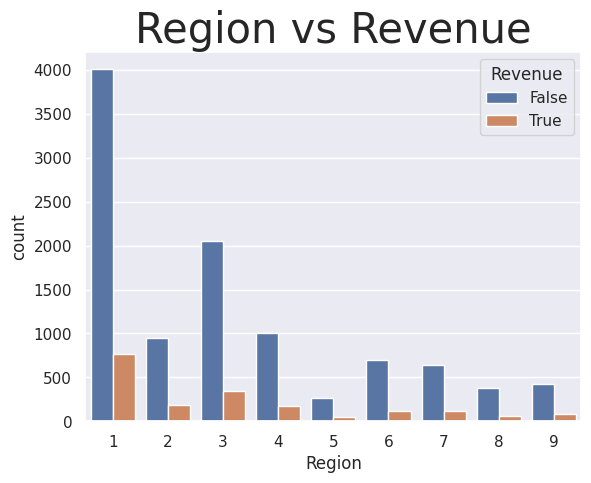

In [21]:
#Step 18: Distribution of Region over Revenue

ax4 = sns.countplot(x='Region', hue='Revenue', data=df)
plt.title('Region vs Revenue', fontsize = 30)
plt.show()

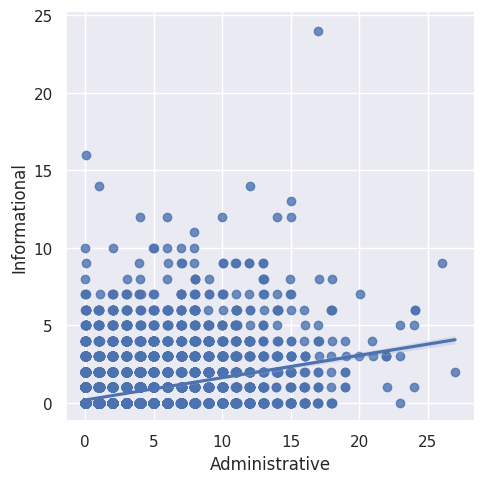

In [22]:
# Step 19: Linear Regression plot between Administrative and Informal

sns.lmplot(x='Administrative', y='Informational', data=df, x_jitter = 0.05)

<Axes: xlabel='Month', ylabel='PageValues'>

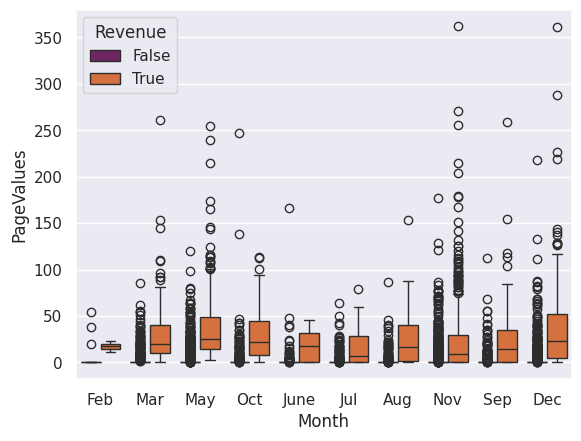

In [23]:
# Step 20: Multi-variate analysis.
# Month vs PAgevalues wrt Revenue

sns.boxplot(x = df['Month'], y = df['PageValues'], hue = df['Revenue'], palette = 'inferno')

Text(0.5, 1.0, 'Mon. vs BounceRates w.r.t. Rev.')

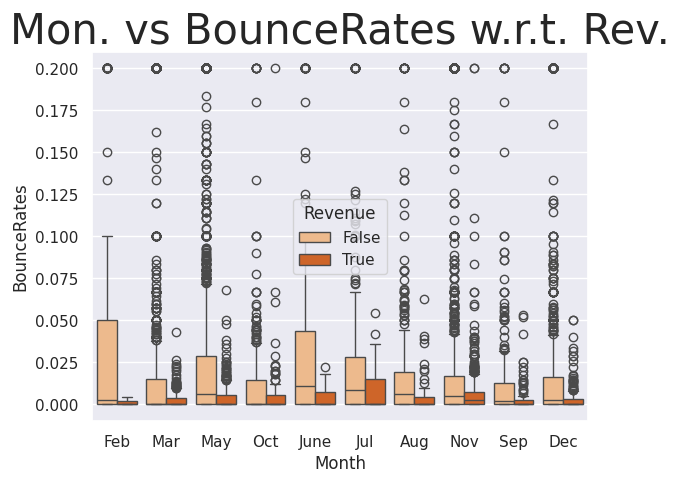

In [24]:
# Step 22: month vs bouncerates wrt revenue

sns.boxplot(x = df['Month'], y = df['BounceRates'], hue = df['Revenue'], palette = 'Oranges')
plt.title('Mon. vs BounceRates w.r.t. Rev.', fontsize = 30)


Text(0.5, 1.0, 'Visitors vs BounceRates w.r.t. Rev.')

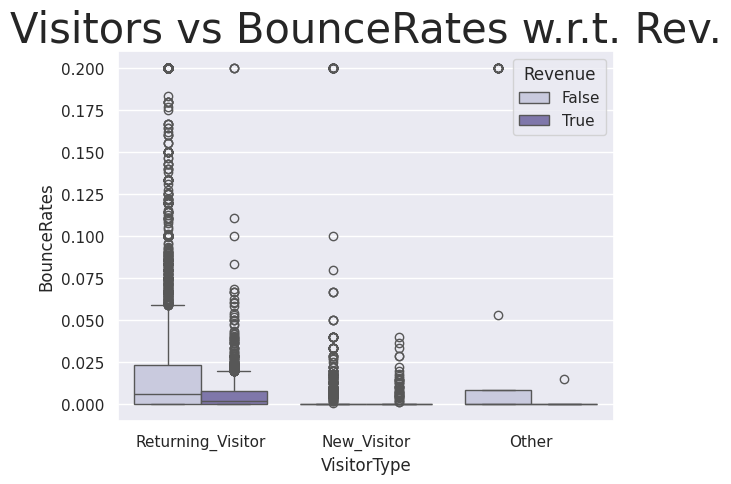

In [25]:
# Step 23: Visitor type vs exit rates w.r.t revenue

sns.boxplot(x = df['VisitorType'], y = df['BounceRates'], hue = df['Revenue'], palette = 'Purples')
plt.title('Visitors vs BounceRates w.r.t. Rev.', fontsize = 30)

Text(0.5, 1.0, 'Visitors vs ExitRates w.r.t. Rev.')

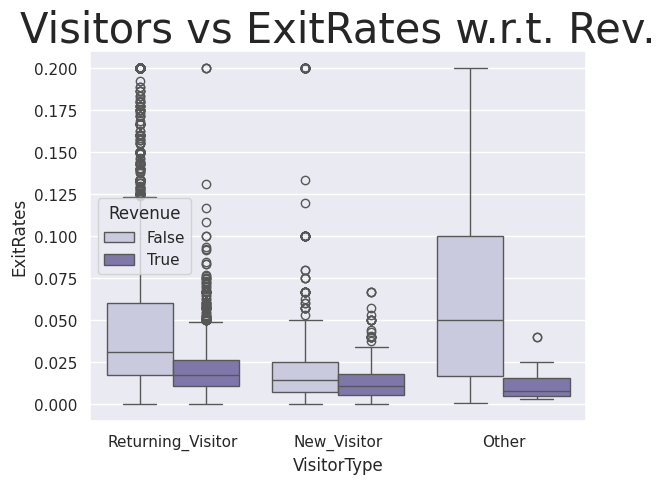

In [26]:
# Step 23: Visitor type vs exit rates w.r.t revenue

sns.boxplot(x = df['VisitorType'], y = df['ExitRates'], hue = df['Revenue'], palette = 'Purples')
plt.title('Visitors vs ExitRates w.r.t. Rev.', fontsize = 30)

Text(0.5, 1.0, 'Visitors vs ExitRates w.r.t. Rev.')

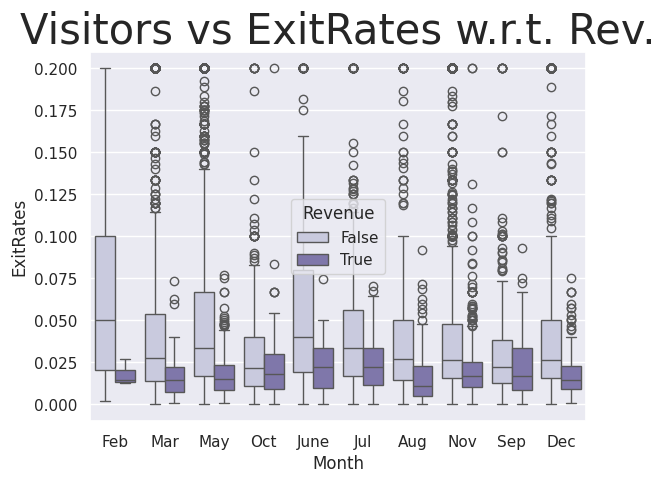

In [27]:
sns.boxplot(x = df['Month'], y = df['ExitRates'], hue = df['Revenue'], palette = 'Purples')
plt.title('Visitors vs ExitRates w.r.t. Rev.', fontsize = 30)

In [28]:
df.fillna(0, inplace = True)
# checking the no. of null values in data after imputing the missing value
df.isnull().sum().sum()

np.int64(0)

/usr/local/lib/python3.12/dist-packages/sklearn/cluster/_kmeans.py:1408: RuntimeWarning: algorithm='elkan' doesn't make sense for a single cluster. Using 'lloyd' instead.
  warnings.warn(


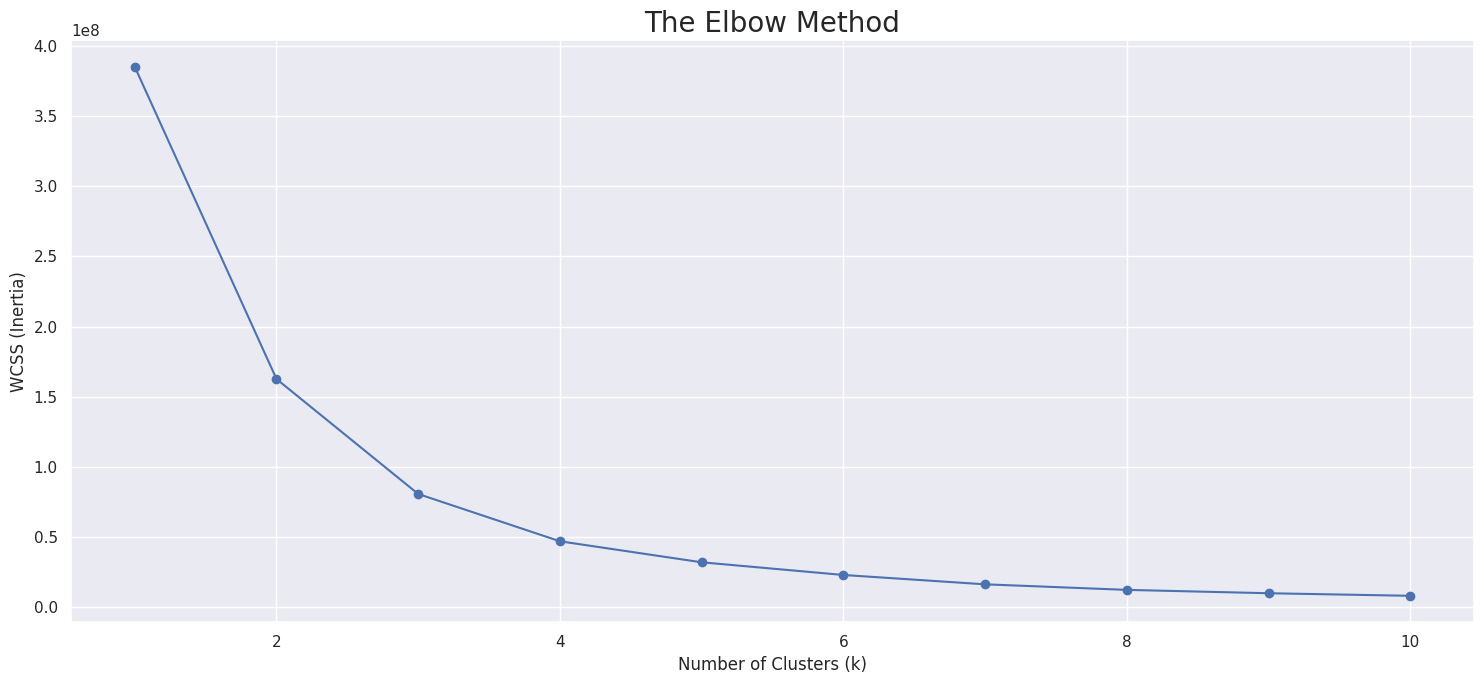

In [29]:
# Elbow Method

from sklearn.cluster import KMeans

# --- Prepare 2D data (same columns you used) ---
x = df.iloc[:, [1, 6]].to_numpy()

# --- Elbow Method: compute WCSS for k = 1..10 ---
wcss = []
for k in range(1, 11):
    km = KMeans(
        n_clusters=k,
        init='k-means++',
        max_iter=300,
        n_init=10,
        random_state=0,
        algorithm='elkan',
        tol=0.001
    )
    km.fit(x)
    wcss.append(km.inertia_)   # <-- append INSIDE the loop

# --- Plot the Elbow ---
plt.figure(figsize=(15, 7))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('The Elbow Method', fontsize=20)
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS (Inertia)')
plt.grid(True)
plt.tight_layout()
plt.show()

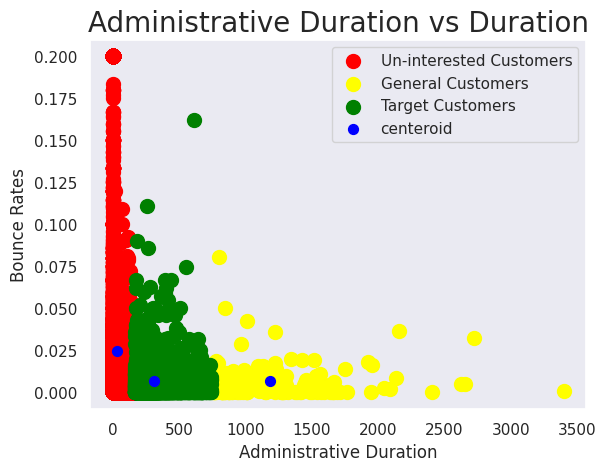

In [30]:
# Step 25 : Since the Elbow method has shown us the max bend is currently at thrid index

km = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_means = km.fit_predict(x)
plt.scatter(x[y_means == 0, 0], x[y_means == 0, 1], s = 100, c = 'red', label = 'Un-interested Customers')
plt.scatter(x[y_means == 1, 0], x[y_means == 1, 1], s = 100, c = 'yellow', label = 'General Customers')
plt.scatter(x[y_means == 2, 0], x[y_means == 2, 1], s = 100, c = 'green', label = 'Target Customers')
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:, 1], s = 50, c = 'blue' , label = 'centeroid')
plt.title('Administrative Duration vs Duration', fontsize = 20)
plt.grid()
plt.xlabel('Administrative Duration')
plt.ylabel('Bounce Rates')
plt.legend()
plt.show()

/usr/local/lib/python3.12/dist-packages/sklearn/cluster/_kmeans.py:1408: RuntimeWarning: algorithm='elkan' doesn't make sense for a single cluster. Using 'lloyd' instead.
  warnings.warn(


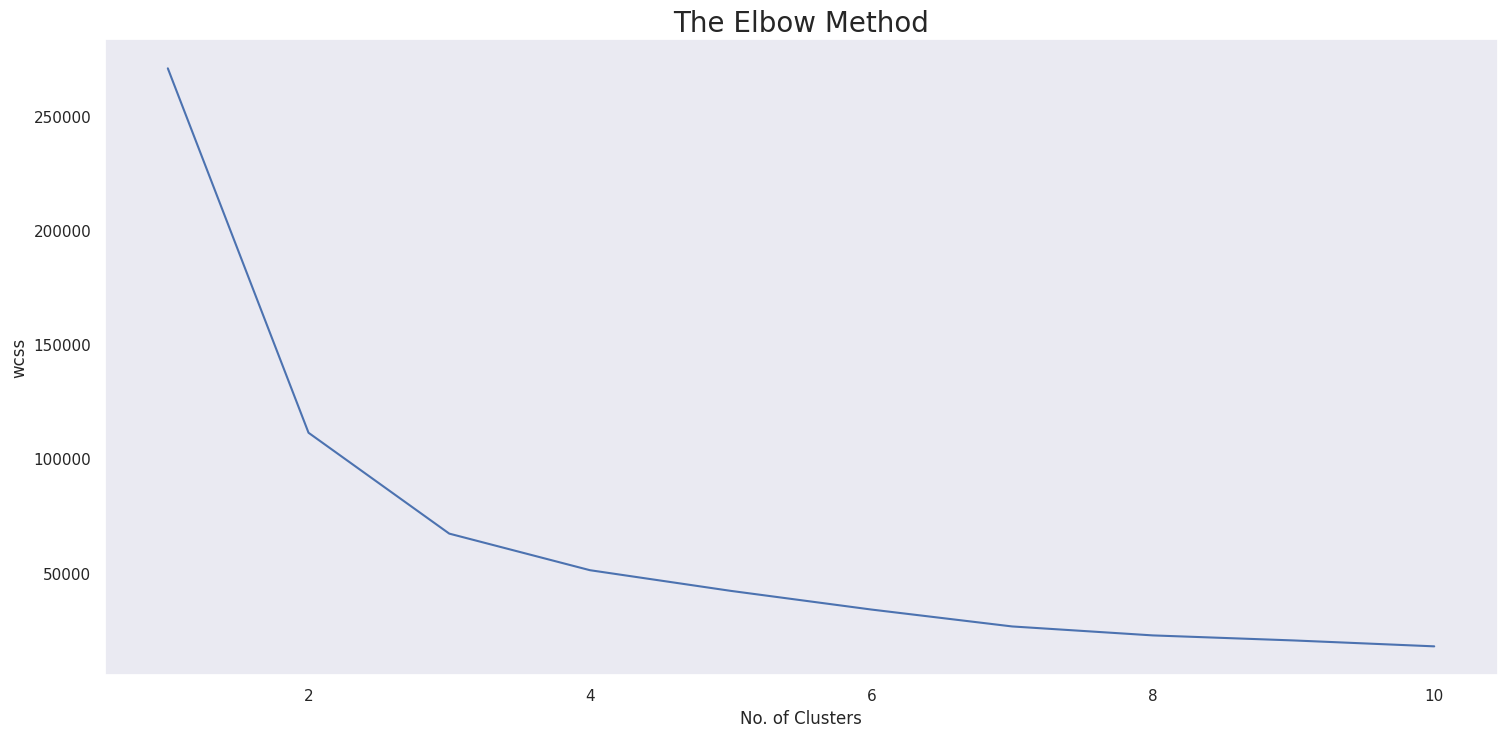

In [32]:
# Step 28 : From Where customer Comes: Region vs Traffic Type

# Region vs Traffic Type
x = df.iloc[:, [13, 14]].values
wcss = []
for i in range(1, 11):
  km = KMeans(n_clusters = i,
  init = 'k-means++',
  max_iter = 300,
  n_init = 10,
  random_state = 0,
  algorithm = 'elkan',
  tol = 0.001)
  km.fit(x)
  labels = km.labels_
  wcss.append(km.inertia_)
plt.rcParams['figure.figsize'] = (15, 7)
plt.plot(range(1, 11), wcss)
plt.grid()
plt.tight_layout()
plt.title('The Elbow Method', fontsize = 20)
plt.xlabel('No. of Clusters')
plt.ylabel('wcss')
plt.show()

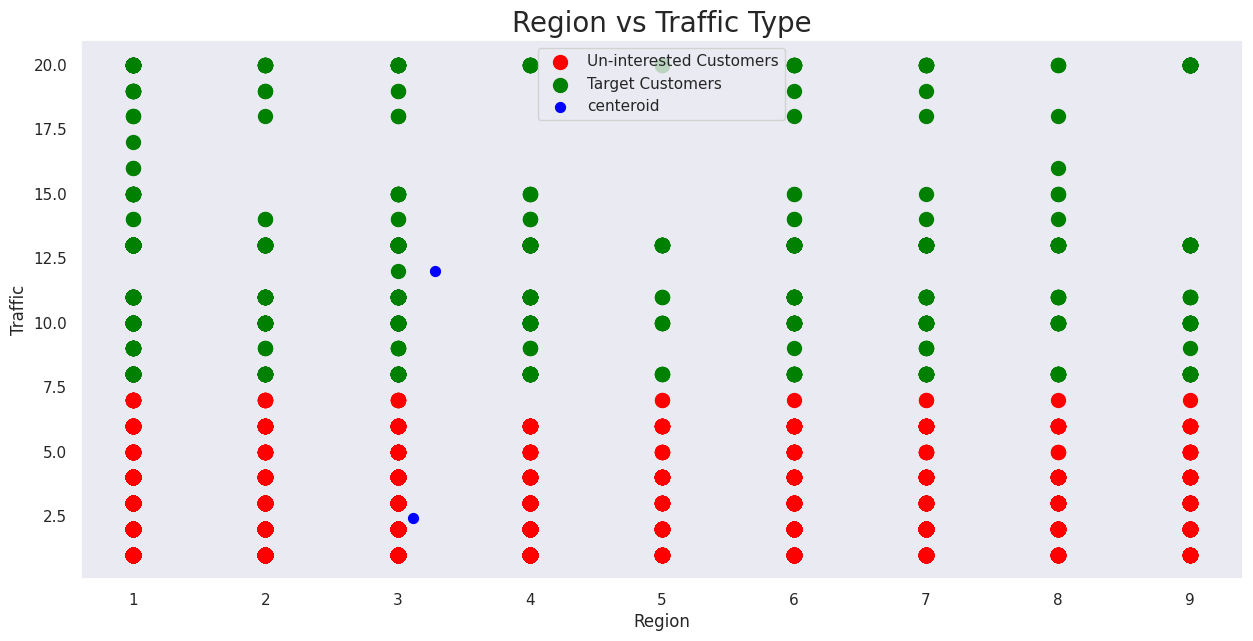

In [34]:
km = KMeans(n_clusters = 2, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_means = km.fit_predict(x)
plt.scatter(x[y_means == 0, 0], x[y_means == 0, 1], s = 100, c = 'red', label = 'Un-interested Customers')
plt.scatter(x[y_means == 1, 0], x[y_means == 1, 1], s = 100, c = 'green', label = 'Target Customers')
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:, 1], s = 50, c = 'blue' , label = 'centeroid')
plt.title('Region vs Traffic Type', fontsize = 20)
plt.grid()
plt.xlabel('Region')
plt.ylabel('Traffic')
plt.legend()
plt.show()

In [35]:
# Data Preprocessing to build a random forest classifier and logistics regression

# one hot encoding
data1 = pd.get_dummies(df)
data1.columns
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Revenue'] = le.fit_transform(df['Revenue'])
df['Revenue'].value_counts()
# getting dependent and independent variables
x=data1
# removing the target column revenue from
x = x.drop(['Revenue'], axis = 1)
y = data1['Revenue']
# checking the shapes
print("Shape of x:", x.shape)
print("Shape of y:", y.shape)

Shape of x: (12330, 28)
Shape of y: (12330,)


In [37]:
# splitting the data
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 0)
# checking the shape
print("Shape of x_train :", x_train.shape)
print("Shape of y_train :", y_train.shape)
print("Shape of x_test :", x_test.shape)
print("Shape of y_test :", y_test.shape)

Shape of x_train : (8631, 28)
Shape of y_train : (8631,)
Shape of x_test : (3699, 28)
Shape of y_test : (3699,)


In [38]:
# MODELLING
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
model = RandomForestClassifier()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
# evaluating the model
print("Training Accuracy :", model.score(x_train, y_train))
print("Testing Accuracy :", model.score(x_test, y_test))

Training Accuracy : 1.0
Testing Accuracy : 0.8921330089213301


              precision    recall  f1-score   support

       False       0.91      0.96      0.94      3077
        True       0.75      0.54      0.63       622

    accuracy                           0.89      3699
   macro avg       0.83      0.75      0.78      3699
weighted avg       0.88      0.89      0.88      3699



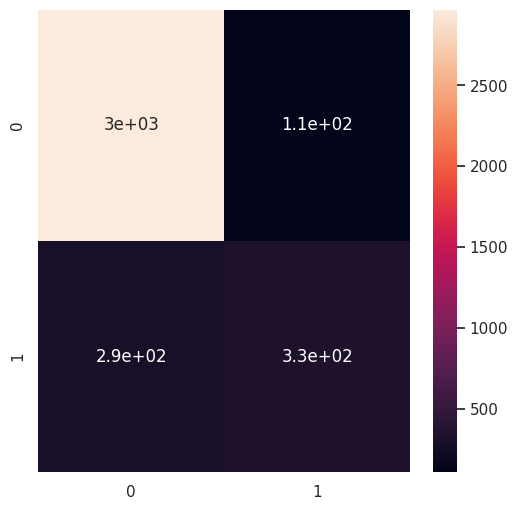

In [39]:
# Step 32: Confusion Matrix

cm = confusion_matrix(y_test, y_pred)
plt.rcParams['figure.figsize'] = (6, 6)
sns.heatmap(cm ,annot = True)
# classification report
cr = classification_report(y_test, y_pred)
print(cr)

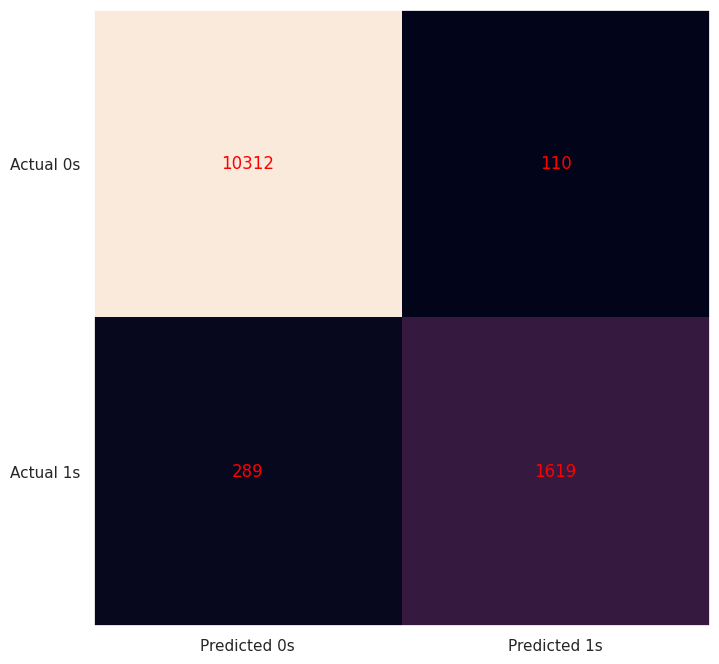

In [44]:
cm = confusion_matrix(y, model.predict(x))
fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
  for j in range(2):
    ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()

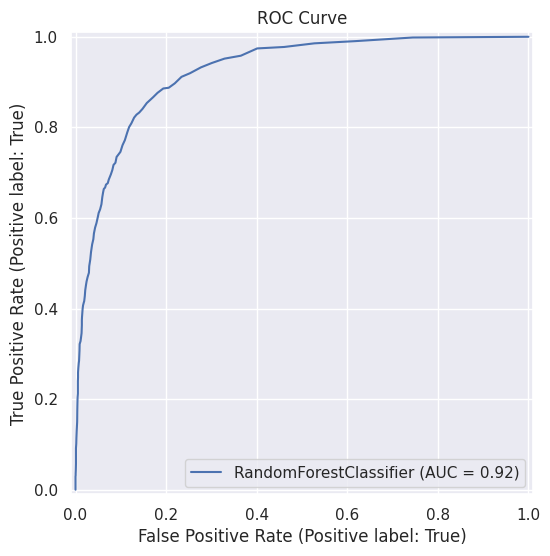

In [46]:
from sklearn.metrics import RocCurveDisplay
import matplotlib.pyplot as plt

# assuming `model` has been fitted already
RocCurveDisplay.from_estimator(model, x_test, y_test)

plt.title("ROC Curve")
plt.show()


In [48]:
# Step 34 : We Save the Predictions of the random forest into a dataframe

df3 = pd.DataFrame(y_pred, columns = ['Revenue'])
df3

,Revenue
0,False
1,False
2,False
3,False
4,False
...,...
3694,False
3695,True
3696,False
3697,False


In [50]:
from sklearn.linear_model import LogisticRegression
model1 = LogisticRegression(solver='liblinear', random_state=0)
model1.fit(x_train, y_train)
y_pred1 = model1.predict(x_test)

In [51]:
# Print the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print ("Confusion Matrix : \n", cm)

Confusion Matrix : 
 [[2967  110]
 [ 289  333]]


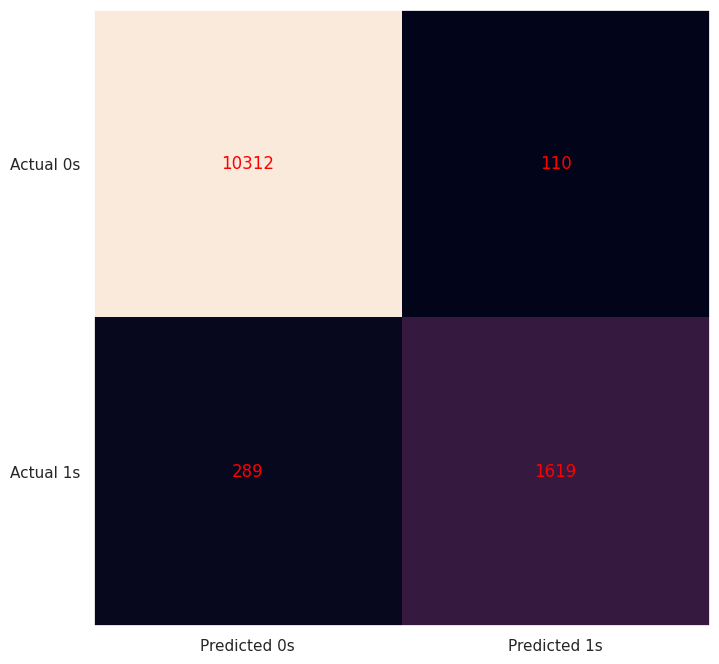

In [52]:
# Step 37: Plotting Confusion Matrix

cm = confusion_matrix(y, model.predict(x))
fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
  for j in range(2):
    ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()

In [54]:
# Step 38 : Printing the Classification Report Accuracy of Logistic Regression

# Classification report

crl = classification_report(y_test,y_pred1)
print(crl)

              precision    recall  f1-score   support

       False       0.89      0.98      0.93      3077
        True       0.76      0.38      0.50       622

    accuracy                           0.88      3699
   macro avg       0.83      0.68      0.72      3699
weighted avg       0.87      0.88      0.86      3699



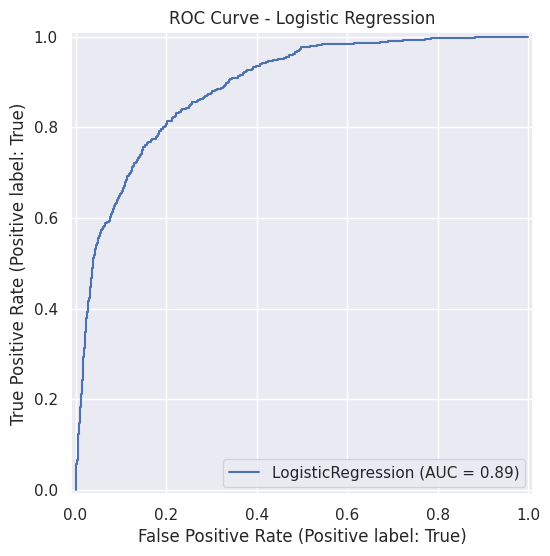

In [57]:
# Step 39: Plotting ROC Cureve for Logistic Regression

from sklearn.metrics import RocCurveDisplay
import matplotlib.pyplot as plt


RocCurveDisplay.from_estimator(model1, x_test, y_test)

plt.title("ROC Curve - Logistic Regression")
plt.show()


In [58]:
# Step 40: Saving the predictions of Logistic Regression model into a DataFrame
df4 = pd.DataFrame(y_pred1,columns=["Revenue"])
df4

,Revenue
0,False
1,False
2,False
3,False
4,False
...,...
3694,False
3695,True
3696,False
3697,False


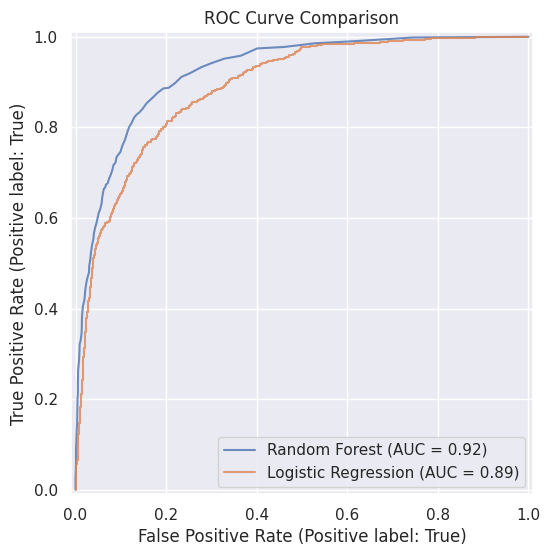

In [61]:
# Step 41:Plotting ROC curve for both Random Forest and Logistic Regression

fig, ax = plt.subplots()

# Random Forest ROC
RocCurveDisplay.from_estimator(model, x_test, y_test, ax=ax, alpha=0.8, name="Random Forest")

# Logistic Regression ROC
RocCurveDisplay.from_estimator(model1, x_test, y_test, ax=ax, alpha=0.8, name="Logistic Regression")

plt.title("ROC Curve Comparison")
plt.show()
